# Perceived Dependence of Stocks and Correlation: Plotting Alpha's of Sample Split

For my thesis, i will look into the difference between the perceived dependence and the actual correlation of the return of stocks with the market return. In this notebook, we will import the results of our sample split and plot them in a barchart. 

## 1. Imports

We will need the following libs:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np

Now, we will read in a simple excel file in which the results of the sample split are copy pasted.

In [2]:
Data_ExcelFile ='ResultsSampleSplit.xlsx'
data =  pd.read_excel(Data_ExcelFile, sheet_name='Alpha')
data.set_index('Factor Model', inplace=True)
data

,Jan 2002 - Feb 2024,Jan 2002 - Dec 2012,Jan 2013 - Feb 2024
Factor Model,,,
Raw,0.005045,0.006274,0.003834
CAPM,0.005638,0.006428,0.005052
3F,0.006226,0.007524,0.005038
4F,0.004510,0.006704,0.000582
4F + QMJ,0.007085,0.010388,0.000888
4F + BAB,0.004518,0.006833,0.000581
4F + Carry,0.005725,0.007825,-0.001730
4F + Seasonality,0.006451,0.008425,0.003054
5F,0.008821,0.010597,0.006505


Then i also had a simple table in the excel where i indicated the number of significance stars. So, for 3, the coefficient is accepted on a 1% significance level. For 2, the coefficient is accepted on a 5% significance level. For 1, the coefficient is accepted on a 10% significance level. For 4, the p-value was higher as 10%.

In [3]:
significance =  pd.read_excel(Data_ExcelFile, sheet_name='Significance')
significance.set_index('Factor Model', inplace=True)
significance

,Jan 2002 - Feb 2024,Jan 2002 - Dec 2012,Jan 2013 - Feb 2024
Factor Model,,,
Raw,0,0,0
CAPM,3,2,1
3F,3,3,2
4F,1,1,0
4F + QMJ,2,3,0
4F + BAB,1,1,0
4F + Carry,1,2,0
4F + Seasonality,2,2,0
5F,3,3,3


## 2. Plotting

Now we will create a bar chart to depict the alphas per model across different periods. 

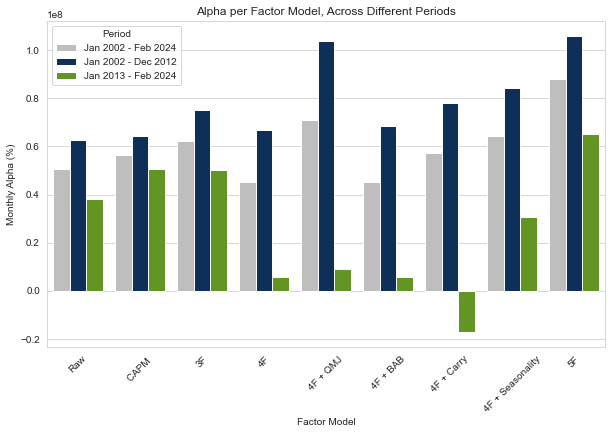

In [10]:
# Convert DataFrame from wide to long format
df_long = data.stack().reset_index()
df_long.columns = ['Factor Model', 'Period', 'Alpha']

# Convert Alpha to percentage
df_long['Alpha'] = df_long['Alpha'] * 100

# Define colors
palette = ['#BEBEBE', '#002E65', '#65A812']

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Factor Model', y='Alpha', hue='Period', data=df_long, palette=palette)

# Add labels and title
plt.xlabel('Factor Model')
plt.ylabel('Monthly Alpha (%)')
plt.title('Alpha per Factor Model, Across Different Periods')

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Save the plot
plt.savefig("alphas_per_model.png")

# Show the plot
plt.show()

In [5]:
# TODO I want the transparency of the bar to be correlated with the significance, making higher p-values less transparent bars. 